## 作業目標
* 畫出 16 個 bin 的顏色直方圖,並嘗試回答每個 channel 在 [16, 32] 這個 bin 中有多少個 pixel？
* 確保同學知道如何改變參數以及理解 cv2.calcHist 這個函數輸出的資料含義

In [0]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

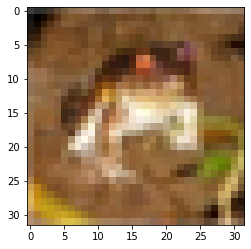

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

image = x_train[0]
plt.imshow(image);

通過調用 __cv2.calcHist(images, channels, mask, histSize, ranges)__ 函數來得到統計後的直方圖值

* images (list of array)：要分析的圖片
* channels：產生的直方圖類型。例：[0]→灰度圖，[0, 1, 2]→RGB三色。
* mask：optional，若有提供則僅計算 mask 部份的直方圖。
* histSize：要切分的像素強度值範圍，預設為256。每個channel皆可指定一個範圍。例如，[32,32,32] 表示RGB三個channels皆切分為32區段。
* ranges：像素的範圍，預設為[0,256]，表示<256。

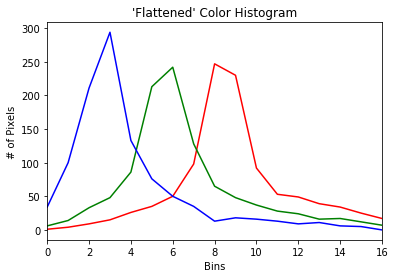

In [0]:
import cv2

colors = ("r", "g", "b")
plt.figure()
plt.title("'Flattened' Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.xlim([0, 16])

hist_dic = {}
for i, col in enumerate(colors):
    hist_16 = cv2.calcHist(images=[image],
                           channels=[i],
                           mask=None, 
                           histSize=[17], 
                           ranges=[0, 256])
    
    plt.plot(hist_16, color=col);

    hist_256 = cv2.calcHist(images=[image],
                            channels=[i],
                            mask=None, 
                            histSize=[256], 
                            ranges=[0, 256])
    hist_dic[col] = int(sum(hist_256[16:32]))

In [0]:
for col, tot_bin in hist_dic.items():
  print(f"{col}: {tot_bin}")

r: 4
g: 17
b: 108
